# Colorstream
## Counting blue occurrences

### Import rsplib and initialize the RSPEngine

In [1]:
from rsplib import RSPEngine

In [2]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [3]:
jasper.streams()

[]

### Define the query, specifing the query id, the t-box and the body of the query

In [4]:
qid  = 'bluecount'

In [5]:
tbox = 'https://linkeddata.stream/ontologies/colors.owl'

In [6]:
body ='''
SELECT (COUNT(?b) as ?blueCount)
FROM NAMED WINDOW <bw> ON <http://streamhub:9292/streamhub/streams/colorstream> [RANGE PT15S STEP PT5S]
WHERE {
    WINDOW ?bw { ?b a <http://www.streamreasoning.org/ontologies/2018/9/colors#Blue> .}
}
'''

In [7]:
frmt = 'JSON'

### Register the query into jasper

In [8]:
bluecount_query = jasper.create(qid, body, tbox, frmt)

In [9]:
bluecount_query.sources()

[GET http://streamhub:9292/streamhub/streams/colorstream]

### The stream has no endpoint. 

In [10]:
bluecount_stream = bluecount_query.stream()
bluecount_stream.endpoints()

[]

### Create a stream endpoint

In [11]:
response = jasper.expose(qid, 'HTTP', retention=5)

In [12]:
jasper.streams()

[http://streamhub:9292/streamhub/streams/colorstream,
 http://jasper:8181/jasper/streams/bluecount]

### Inspect and call the response endpoints

In [13]:
response.endpoints()

[GET http://jasper:8182/jasper/streams/bluecount/observers/1363234447]

In [14]:
from time import sleep
# just wait for few windows to be evaluated
sleep(10)

output = response.endpoints()[0].call()
output

[
    {
        "head": {
            "vars": [
                "blueCount"
            ]
        },
        "results": {
            "bindings": [
                {
                    "blueCount": {
                        "type": "literal",
                        "datatype": "http://www.w3.org/2001/XMLSchema#integer",
                        "value": "12"
                    }
                }
            ]
        }
    },
    {
        "head": {
            "vars": [
                "blueCount"
            ]
        },
        "results": {
            "bindings": [
                {
                    "blueCount": {
                        "type": "literal",
                        "datatype": "http://www.w3.org/2001/XMLSchema#integer",
                        "value": "16"
                    }
                }
            ]
        }
    },
    {
        "head": {
            "vars": [
                "blueCount"
            ]
        },
        "results": {
            "bin

In [15]:
output_df = output.flatten().dataframe()[['results_bindings_0_blueCount_value']]
output_df = output_df.astype({'results_bindings_0_blueCount_value': 'int32'})
output_df

,results_bindings_0_blueCount_value
0,12
1,16
2,17
3,18


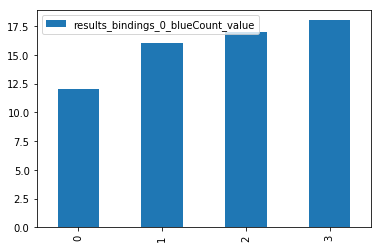

In [16]:
%matplotlib inline
output_df.plot(kind='bar');

In [17]:
jasper.delete(qid)

{
    "@id": "queries/bluecount",
    "@type": "vprov:Task",
    "prov:generated": {
        "@id": "streams/bluecount"
    },
    "prov:uses": {
        "@id": "http://streamhub:9292/streamhub/streams/colorstream"
    },
    "@context": {
        "@base": "http://jasper:8181/jasper/",
        "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
        "vsd": "http://w3id.org/rsp/vocals-sd#",
        "vocals": "http://w3id.org/rsp/vocals#",
        "xsd": "http://www.w3.org/2001/XMLSchema#",
        "format": "http://www.w3.org/ns/formats/",
        "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
        "vprov": "http://w3id.org/rsp/vocals-prov#",
        "dcat": "http://www.w3.org/ns/dcat#",
        "prov": "http://www.w3.org/ns/prov#"
    }
}